# Reference: RL Model Code

## Initialization

In [36]:
# Run dependencies
%run ./RL_model_python_lib_utils.ipynb
%run ./RL_model_python_lib_reward.ipynb
%run ./RL_model_python_lib_decision_functions.ipynb
%run ./RL_model_python_lib_visualization.ipynb

## Model Fit

In [2]:
df = read_rps_data(os.path.join("data", DEFAULT_FILE))

In [3]:
# add opponent move column
separated = separate_df(df)
for e in separated:
    get_opponent_move(e)
df = pd.concat(separated)

### a) human_reward_move

In [4]:
df_a = add_col(df, ['rock_reward', 'paper_reward','scissors_reward',], value =0)
separated = separate_df(df_a)
for e in separated:
    human_reward_move(e)
df_a = pd.concat(separated)

In [5]:
soft_dist = get_softmax_probabilities(
    df_a, # df should be just human rows at this point, strip out nans etc. 
    ['rock_reward', 'paper_reward', 'scissors_reward']
)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df_a = pick_move(df_a, soft_dist)

In [30]:
df_a=df_a[df_a['is_bot']==0]
df_a=assign_agent_outcomes(df_a)

<AxesSubplot:title={'center':'Win percentage against bot strategies'}, xlabel='Trial round', ylabel='Mean win percentage'>

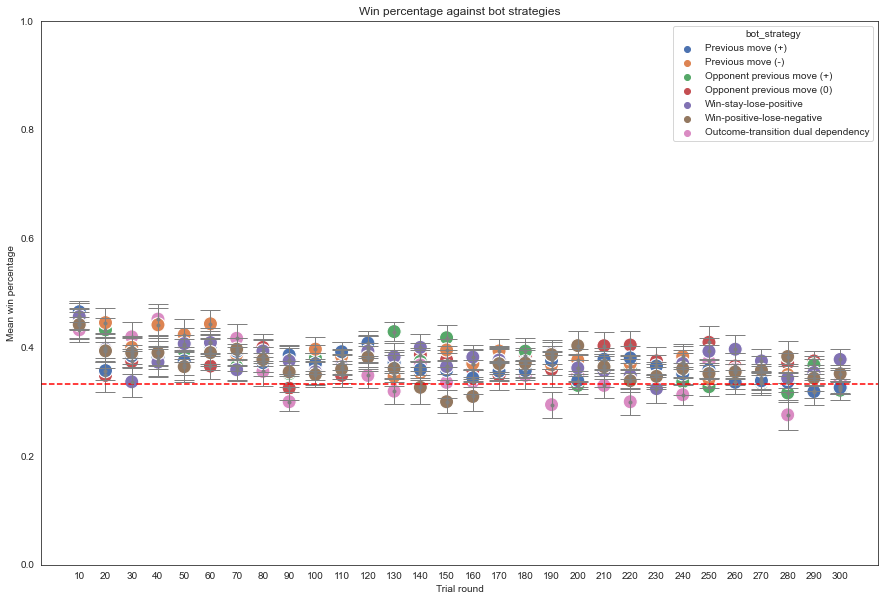

In [37]:
plot_win_rates(win_summary(groupby_f_data(df_a,'agent_outcome',30),'agent_outcome'))

### 3b human_past_current_reward_move

/var/folders/tm/sjjwcmbs3250mhfs5psrzf5w0000gn/T/ipykernel_57245/2958750840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)


<AxesSubplot:title={'center':'Win percentage against bot strategies'}, xlabel='Trial round', ylabel='Mean win percentage'>

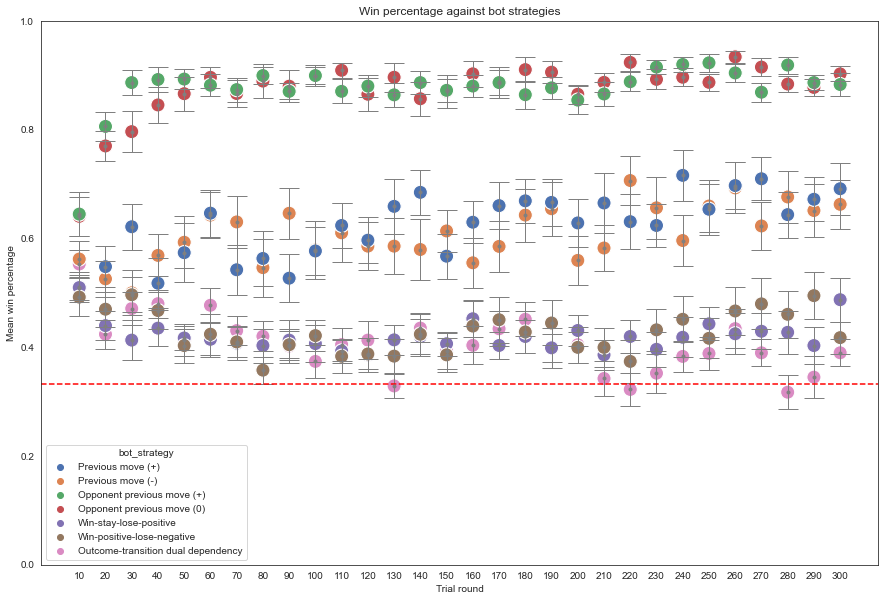

In [12]:
plot_win_rates(win_summary(groupby_f_data(df_result_3b,'agent_outcome',30),'agent_outcome'))

### 3c opponent_past_human_current_reward_move

In [13]:
def human_reward_oppo_past_cur_move(sub_df):
    '''
    tally rewards based on both opponent past and human current moves
    '''
    dic_reward={'win':3,'tie':0,'loss':-1}
    dic_move={'rock':{'rock':0,'paper':0,'scissors':0},'paper':{'rock':0,'paper':0,'scissors':0},
    'scissors':{'rock':0,'paper':0,'scissors':0}}
    for i in range(2,len(sub_df),2):
        outcome=sub_df.get('player_outcome').iloc[i]
        oppo_pre_move=sub_df.get('player_move').iloc[i-1]
        cur_move=sub_df.get('player_move').iloc[i]
        if oppo_pre_move != 'none'and not pd.isna(oppo_pre_move) and cur_move != 'none'and not pd.isna(cur_move): # this line may skip nan row, reward may look like 0,0,0
            dic_move[oppo_pre_move][cur_move]+=dic_reward[outcome]
            col_name='opponent_'+oppo_pre_move+'_'+cur_move+'_reward'
            sub_df.at[i,'opponent_rock_rock_reward']=dic_move['rock']['rock']
            sub_df.at[i,'opponent_rock_paper_reward']=dic_move['rock']['paper']
            sub_df.at[i,'opponent_rock_scissors_reward']=dic_move['rock']['scissors']
            sub_df.at[i,'opponent_paper_rock_reward']=dic_move['paper']['rock']
            sub_df.at[i,'opponent_paper_paper_reward']=dic_move['paper']['paper']
            sub_df.at[i,'opponent_paper_scissors_reward']=dic_move['paper']['scissors']
            sub_df.at[i,'opponent_scissors_rock_reward']=dic_move['scissors']['rock']
            sub_df.at[i,'opponent_scissors_paper_reward']=dic_move['scissors']['paper']
            sub_df.at[i,'opponent_scissors_scissors_reward']=dic_move['scissors']['scissors'] 
    return sub_df 

In [14]:
# separate df into same game id
separated = separate_df(df)
for e in separated:
    human_reward_oppo_past_cur_move(e)
df = pd.concat(separated)

,game_id,version,is_sona_autocredit,sona_experiment_id,sona_credit_token,sona_survey_code,round_index,player_id,is_bot,bot_strategy,...,scissors_scissors_reward,opponent_rock_rock_reward,opponent_rock_paper_reward,opponent_rock_scissors_reward,opponent_paper_rock_reward,opponent_paper_paper_reward,opponent_paper_scissors_reward,opponent_scissors_rock_reward,opponent_scissors_paper_reward,opponent_scissors_scissors_reward
0,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,f1c3a029-e381-4f79-afbe-677ef9416f04,1,outcome_transition_dual_dependency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,3,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,outcome_transition_dual_dependency,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,298,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,...,-4.0,83.0,15.0,28.0,35.0,99.0,15.0,5.0,33.0,84.0
597,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,aaef3106-84a2-4e42-a31f-4bcaa7c659dd,1,opponent_prev_move_positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,300,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,opponent_prev_move_positive,...,-4.0,83.0,15.0,28.0,35.0,99.0,18.0,5.0,33.0,84.0


In [15]:
def get_softmax_probabilities_3c(df):
    '''
    generate softmax probability distribution of each round so we can sample moves from the distribution
    '''
    # df.dropna(axis = 0)
    distribution = []
    vals=[[0.33,0.33,0.33]] # has deleted one default prob list
    for i in range(2,df.shape[0],2):
        pre_move=df.get('player_move').iloc[i-1] # -1 instead of -2 since opponent_pre
        if pre_move != 'none' and not pd.isna(pre_move):
            reward_cols=[f'opponent_{pre_move}_rock_reward',f'opponent_{pre_move}_paper_reward',f'opponent_{pre_move}_scissors_reward']
            val = df[reward_cols].iloc[i].tolist()
            vals.append(val)
        else:
            val=vals[-1]
            vals.append(val)
    soft_max=[softmax(x) for x in vals] 
    sofm = pd.DataFrame(soft_max, columns = ['softmax_prob_rock', 'softmax_prob_paper', 'softmax_prob_scissors'])
    
    # strip only human df outside of the function
    df_new = df[df.is_bot == 0].reset_index()
    df_new = pd.concat([df_new,sofm], axis = 1)
    return df_new

In [16]:
def pick_move_3c(df):
    '''
    sample agent move based on softmax distribution
    '''
    moves = np.array([])
    for i in range(df.shape[0]):
        move_choices = ['rock', 'paper', 'scissors']
        distribution = df[['softmax_prob_rock', 'softmax_prob_paper', 'softmax_prob_scissors']].iloc[i].tolist() # get ith [rock_prob,paper_prob,scissors_prob] from input df 
        chosen_move = random.choices(move_choices, distribution) 
        moves = np.append(moves, chosen_move)
    df = df.assign(agent_move = moves) # agent_move stores sampled moves
    return df

In [17]:
separated = separate_df(df)
df_result_3c = pd.DataFrame()
# align results from the generaed agent move and opponent move
for e in separated:
    e = get_softmax_probabilities_3c(e)
    e=pick_move_3c(e)
    e['agent_outcome'] = e.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    df_result_3c=pd.concat([df_result_3c,e],axis=0)

/var/folders/tm/sjjwcmbs3250mhfs5psrzf5w0000gn/T/ipykernel_57245/2958750840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)


<AxesSubplot:title={'center':'Win percentage against bot strategies'}, xlabel='Trial round', ylabel='Mean win percentage'>

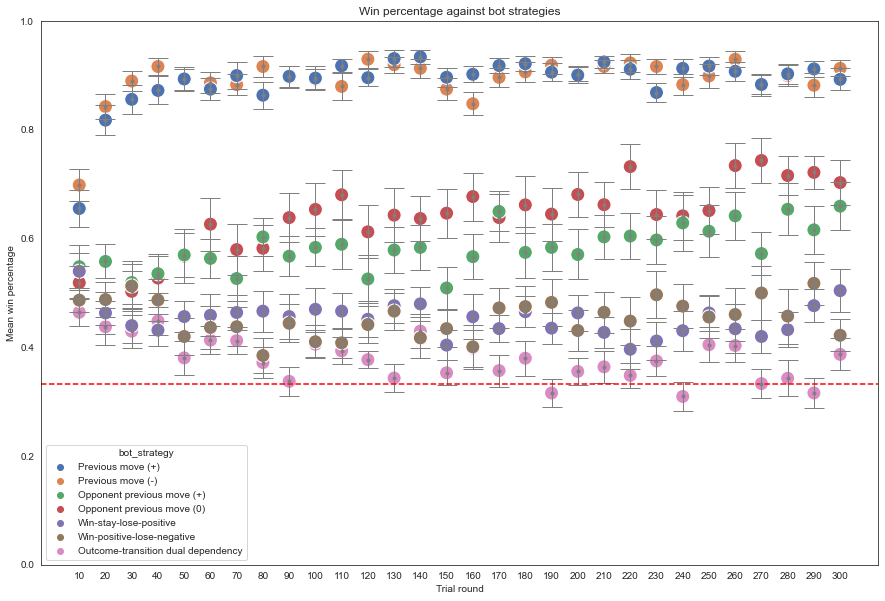

In [18]:
plot_win_rates(win_summary(groupby_f_data(df_result_3c,'agent_outcome',30),'agent_outcome'))